### Data Collection

##### Import Required Libraries

In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [3]:
style.use('ggplot')

In [4]:
titanic_data = pd.read_excel('titanic3.xls')
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Exploratory Data Analysis

<AxesSubplot:xlabel='survived', ylabel='count'>

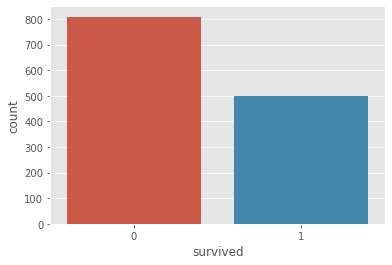

In [5]:
sns.countplot(x='survived', data=titanic_data)

<AxesSubplot:xlabel='survived', ylabel='count'>

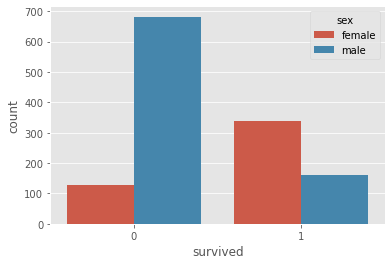

In [6]:
sns.countplot(x='survived', data=titanic_data, hue='sex')

<AxesSubplot:xlabel='survived', ylabel='count'>

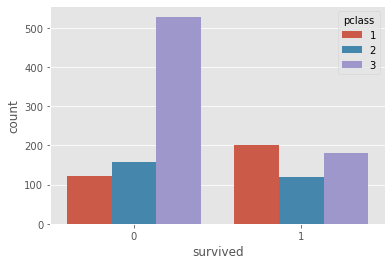

In [7]:
sns.countplot(x='survived', data=titanic_data, hue='pclass')

<AxesSubplot:xlabel='age', ylabel='Count'>

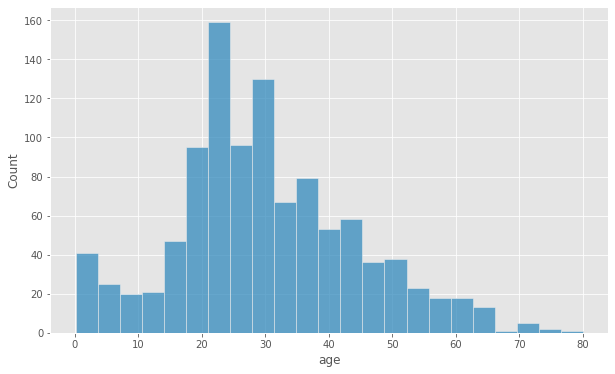

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(x='age', data=titanic_data)

<AxesSubplot:xlabel='fare', ylabel='Count'>

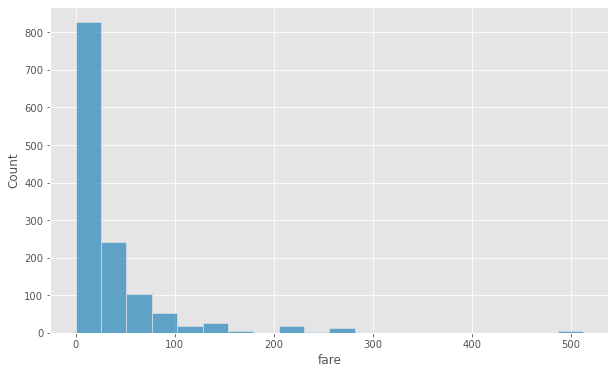

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(x='fare', data=titanic_data, bins=20)

### Data Wrangling

In [10]:
titanic_data.shape

(1309, 14)

In [11]:
titanic_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [12]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


##### Checking Missing Values

In [13]:
titanic_data.columns[titanic_data.isna().any()].to_list()

['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']

Missing values exists in the above columns

In [14]:
# Count of missing values in every column
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

##### Visualizing Missing Values

<AxesSubplot:>

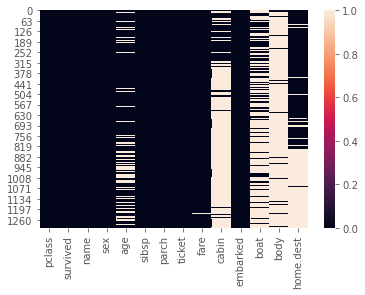

In [15]:
sns.heatmap(data=titanic_data.isnull())

<AxesSubplot:xlabel='pclass', ylabel='age'>

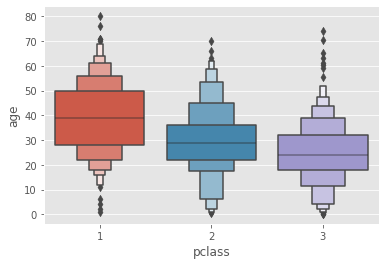

In [16]:
sns.boxenplot(x='pclass', y='age', data=titanic_data)

In [17]:
titanic_data.drop(['cabin','boat','body','home.dest'], inplace=True, axis=1)

In [18]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [19]:
titanic_data.shape

(1309, 10)

##### Drop Missing Values

In [20]:
titanic_data.dropna(inplace=True)

<AxesSubplot:>

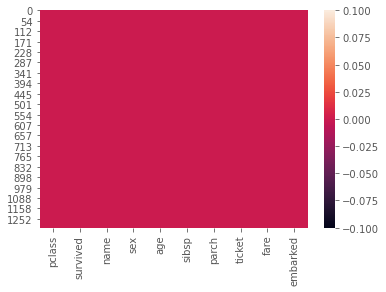

In [21]:
sns.heatmap(data=titanic_data.isnull())

In [22]:
titanic_data.shape

(1043, 10)

In [23]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


### Feature Engineering

In [24]:
gender = pd.get_dummies(titanic_data['sex'], drop_first=True)
origin = pd.get_dummies(titanic_data['embarked'], drop_first=True)
class_distinction = pd.get_dummies(titanic_data['pclass'], drop_first=True)

titanic_data = pd.concat([titanic_data,gender,origin,class_distinction], axis=1)

In [25]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S,2,3
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,0,0,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,0,1,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,0,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1,0,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,0,1,0,0


In [26]:
titanic_data.shape

(1043, 15)

##### Droping features that are not important

In [27]:
titanic_data.drop(['pclass','name','sex','ticket','embarked'],axis=1, inplace=True)

In [28]:
titanic_data.rename(columns={'male':'gender',2:'2nd_class',3:'3rd_class'})

,survived,age,sibsp,parch,fare,gender,Q,S,2nd_class,3rd_class
0,1,29.0000,0,0,211.3375,0,0,1,0,0
1,1,0.9167,1,2,151.5500,1,0,1,0,0
2,0,2.0000,1,2,151.5500,0,0,1,0,0
3,0,30.0000,1,2,151.5500,1,0,1,0,0
4,0,25.0000,1,2,151.5500,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1301,0,45.5000,0,0,7.2250,1,0,0,0,1
1304,0,14.5000,1,0,14.4542,0,0,0,0,1
1306,0,26.5000,0,0,7.2250,1,0,0,0,1
1307,0,27.0000,0,0,7.2250,1,0,0,0,1


In [32]:
titanic_data.age = [math.ceil(x) for x in titanic_data['age']]

In [33]:
titanic_data.head()

,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,1,29,0,0,211.3375,0,0,1,0,0
1,1,1,1,2,151.5500,1,0,1,0,0
2,0,2,1,2,151.5500,0,0,1,0,0
3,0,30,1,2,151.5500,1,0,1,0,0
4,0,25,1,2,151.5500,0,0,1,0,0


### Splitting Data

In [35]:
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

### Train Data

In [38]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\BOAZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
prediction = log_reg.predict(X_test)

In [40]:
metrics.accuracy_score(y_test,prediction)

0.8146964856230032

##### Holdout Validation Approach - Train and Test Set Split

In [42]:
result = log_reg.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 81.47%


##### K-fold Cross-Validation